In [1]:
import glob
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from book_depository import train_test_split
import os
import shutil
import random
from PIL import Image
from matplotlib.pyplot import imshow

In [2]:
test_path='D:\\jupyterlab\\Super Data Science Challanges\\sds_challenges\\data\\book-covers-test\\'
train_path='D:\\jupyterlab\\Super Data Science Challanges\\sds_challenges\\data\\book-covers-train\\'
copy_path='D:\\jupyterlab\\Super Data Science Challanges\\sds_challenges\\data\\book-covers-copy\\'
original_path='D:\\jupyterlab\\Super Data Science Challanges\\sds_challenges\\data\\book-covers\\'

In [3]:
file_counts={}
for filename in glob.glob(original_path+'*\\*.jpg', recursive=True):
    if filename.split('\\')[-2] not in file_counts:
        file_counts[filename.split('\\')[-2]] = 1
    else:
        file_counts[filename.split('\\')[-2]] += 1   
        

Checking the number of exapmples per class we see they are evenly trained

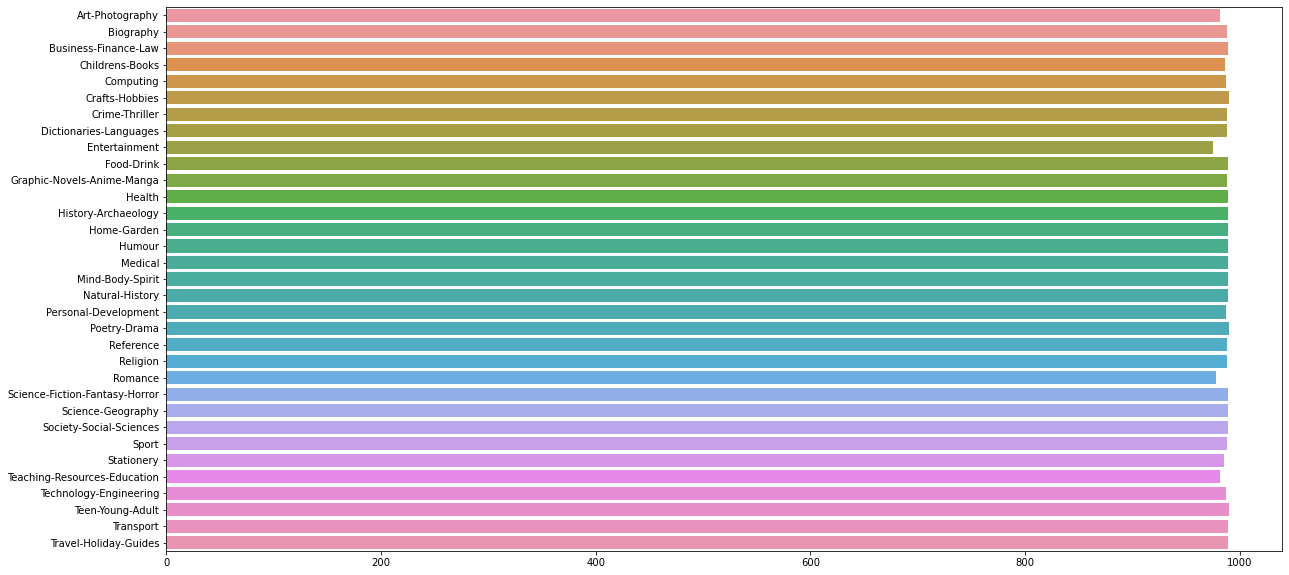

In [4]:
plt.figure(figsize=(20,10))
sns.barplot(x=list(file_counts.values()),y=list(file_counts.keys()))

In [5]:
# There are 33 differnt classes
len(file_counts)

33

In [6]:
# Function to splot the data into training and testing
train_test_split(original_path,copy_path,test_path,train_path)

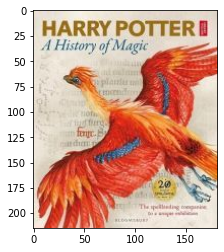

In [8]:
#Randomly display an image
pil_im = Image.open(original_path+'Art-Photography//0000014.jpg')
imshow(np.asarray(pil_im))

In [9]:
#getting the image size
print(np.shape(pil_im))

(215, 182, 3)


### Creating Data Generators

Resizing images

    Big pre-trained architecture support only certain input sizes.

For example: MobileNet (architecture that we use) supports: (96, 96), (128, 128), (160, 160), (192, 192), (224, 224).

In [43]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_test = ImageDataGenerator(rescale=1/255.)

In [44]:
train_generator = data_gen_train.flow_from_directory(train_path, target_size=(224,224), batch_size=128, class_mode="categorical",shuffle = True)
test_generator = data_gen_train.flow_from_directory(test_path, target_size=(224,224), batch_size=128, class_mode="categorical",shuffle = True)

Found 29282 images belonging to 33 classes.
Found 3300 images belonging to 33 classes.


building the model

In [45]:
IMG_SHAPE = (224, 224, 3)

In [46]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

### Freezing the base model

In [75]:
base_model.trainable = False

Defining the custom head for our network

In [76]:
base_model.output

<tf.Tensor 'out_relu_1/Identity:0' shape=(None, 7, 7, 1280) dtype=float32>

In [79]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
flatteining_layer = tf.keras.layers.Dense(units=128)(global_average_layer)

In [80]:
flatteining_layer

<tf.Tensor 'dense_12/Identity:0' shape=(None, 128) dtype=float32>

In [81]:
prediction_layer = tf.keras.layers.Dense(units=33, activation='softmax')(flatteining_layer)

In [82]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [83]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

Compliling the model

In [84]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

train the model

In [64]:
model.fit(train_generator, epochs=1, validation_data=test_generator , shuffle=True)

229/229 [==============================] - 461s 2s/step - loss: 19.5419 - accuracy: 0.0810 - val_loss: 9.9349 - val_accuracy: 0.0870
